## ECBM E6040 Homework 3 - Programming Problem

In [2]:
%matplotlib inline
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy
from hw3a import test_adversarial_example
from hw3b import test_lenet

/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
Using gpu device 0: GRID K520


For all parts of Problem A, patience was set to 30000. For parts i, ii and iii, the number of epochs was set to 300.

### Problem A: Regularization Methods for Neural Network
#### Bullet 1: Implement a MLP

In [ ]:
test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=300,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, smaller_set=True)

In [ ]:
test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=300,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, smaller_set=False)

A 3 layer 500 node MLP sees a ~5% performance improvement when trained on the full dataset.

#### Bullet 2: Experiment with noise injection at input

In [ ]:
for i in [0.1, 0.05, 0.001, 0.005, 0.0001]:
        test_noise_inject_at_input(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=300,
                 batch_size=128, n_hidden=500, n_hiddenLayers=3,
                 verbose=False, noise_type='normal', scale=i, double_noise=False)
        test_noise_inject_at_input(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=300,
                 batch_size=128, n_hidden=500, n_hiddenLayers=3,
                 verbose=False, noise_type='normal', scale=i, double_noise=True)
        test_noise_inject_at_input(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=300,
                 batch_size=128, n_hidden=500, n_hiddenLayers=3,
                 verbose=False, noise_type='uniform', scale=i, double_noise=False)
        test_noise_inject_at_input(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=300,
                 batch_size=128, n_hidden=500, n_hiddenLayers=3,
                 verbose=False, noise_type='uniform', scale=i, double_noise=True)

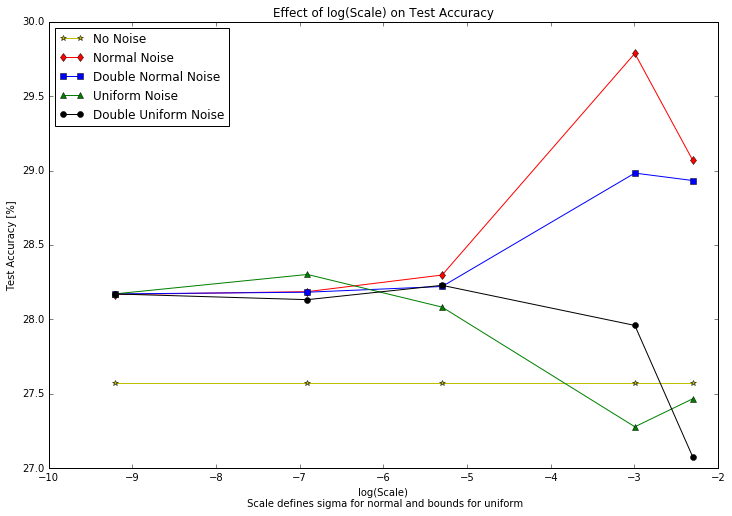

In [2]:
x = numpy.log([0.1, 0.05, 0.005, 0.001, 0.0001])
y_mlp = [27.570813] * 5
y_n = [29.067888, 29.787562, 28.298183, 28.186576, 28.167334] 
y_n_2 = [28.933190, 28.983220, 28.221213, 28.182728, 28.171182]
y_u = [27.466903, 27.278325, 28.082666, 28.302032, 28.171182]
y_u_2 = [27.074353, 27.959514, 28.228910, 28.132697, 28.171182]

plt.figure(figsize=(12, 8))
plt.plot(x, y_mlp, 'y*-', label='No Noise')
plt.plot(x, y_n, 'rd-', label='Normal Noise')
plt.plot(x, y_n_2, 'bs-', label='Double Normal Noise') 
plt.plot(x, y_u, 'g^-', label='Uniform Noise') 
plt.plot(x, y_u_2, 'ko-', label='Double Uniform Noise')
plt.xlabel('log(Scale)\n Scale defines sigma for normal and bounds for uniform') 
plt.ylabel('Test Accuracy [%]')
plt.title('Effect of log(Scale) on Test Accuracy')
plt.legend(loc=2)
plt.show()

Double uniform noise bounded by -0.1 and 0.1 performed the best, followed by uniform noise bounded by -0.01 and 0.01 and -0.1 and 0.1. Uniform noise tends to perform much better at the higher end of the scale and beats the base MLP while gaussian noise does not beat the base MLP.

#### Bullet 3: Experiment with noise injection at weights

In [ ]:
for i in [0.1, 0.01, 0.001, 0.0001, 0.00005, 0.00001, 0.000005]:
        test_noise_inject_at_weight(learning_rate=0.01,
             L1_reg=0.00, L2_reg=0.0001, n_epochs=300,
             batch_size=128, n_hidden=500, n_hiddenLayers=3, scale=i,
             verbose=False, noise_type='normal')
        test_noise_inject_at_weight(learning_rate=0.01,
             L1_reg=0.00, L2_reg=0.0001, n_epochs=300,
             batch_size=128, n_hidden=500, n_hiddenLayers=3, scale=i,
             verbose=False, noise_type='uniform')

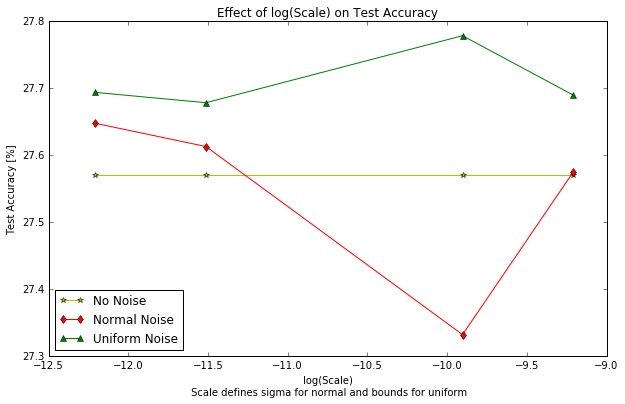

In [3]:
x = numpy.log([0.0001, 0.00005, 0.00001, 0.000005])
y_mlp = [27.570813] * 4
y_n = [27.574661, 27.332204, 27.613147, 27.647783]
y_u = [27.690117, 27.778633, 27.678571, 27.693966]

plt.figure(figsize=(10, 6))
plt.plot(x, y_mlp, 'y*-', label='No Noise')
plt.plot(x, y_n, 'rd-', label='Normal Noise')
plt.plot(x, y_u, 'g^-', label='Uniform Noise')
plt.xlabel('log(Scale)\n Scale defines sigma for normal and bounds for uniform') 
plt.ylabel('Test Accuracy [%]')
plt.title('Effect of log(Scale) on Test Accuracy')
plt.legend(loc=3)
plt.show()

Only gaussian noise with mean 0 and standard deviation 0.00005 beat the base MLP. Gaussian noise is generally better than uniform noise but performance converges at the lower and higher ends of the sclae. Uniform noise at any scale does not beat the base MLP.

#### Bullet 4: Experiment with data augmentation

In [ ]:
for i in [100, 200, 300, 400, 500]:    
    test_data_augmentation(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=i,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False)

Augmenting the data does improve the performance by ~1%, but increasing the number of epochs leads to worse performance.

#### Bullet 5: Experiment with adversarial examples

... building the model
... training
Optimization complete.
Best validation score of 37.571023 % obtained at iteration 10300, with test performance 38.296644 %


The training process for function test_adv_mlp ran for 1.42m


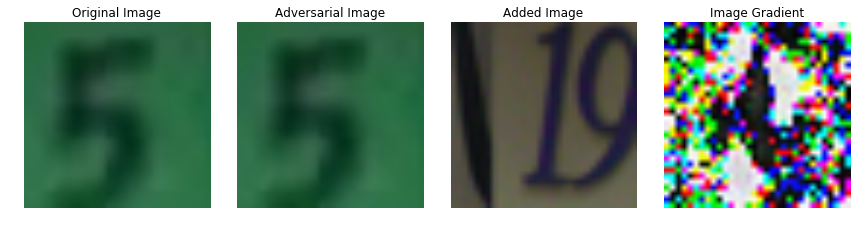

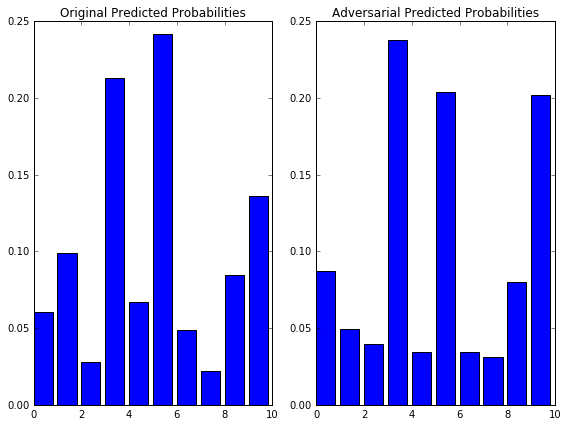

In [4]:
test_adversarial_example()

The model can be fooled easily as it is too linear. However, the adversarial predicted probabilities did not reflect a rise in the probability of 1 which is the label for the added image.

### Problem b: Convolutional Neural Network
#### Bullet 1: Implement an CNN

In [ ]:
test_lenet(nkerns=[16, 512], filter_size=3, verbose=True)
test_lenet(nkerns=[16, 512], filter_size=5, verbose=True)
test_lenet(nkerns=[16, 512], filter_size=7, verbose=True)
test_lenet(nkerns=[8, 256], filter_size=7, verbose=True)
test_lenet(nkerns=[32, 1024], filter_size=7, verbose=True)

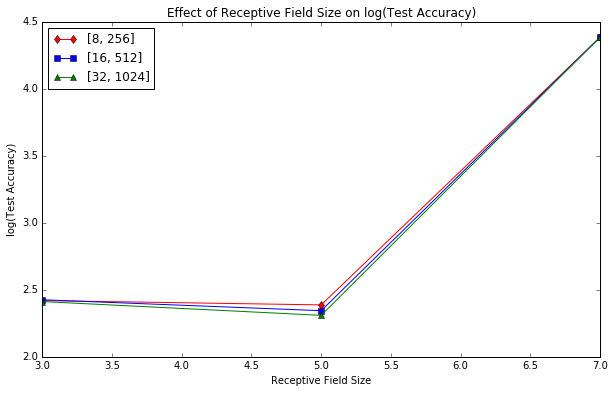

In [5]:
x = [3, 5, 7]
y_8_256 = numpy.log([11.242308, 10.888462, 80.415385])
y_16_512 = numpy.log([11.311538, 10.426923, 80.415385])
y_32_1024 = numpy.log([11.161538, 10.069231, 80.415385])

plt.figure(figsize=(10, 6))
plt.plot(x, y_8_256, 'rd-', label='[8, 256]')
plt.plot(x, y_16_512, 'bs-', label='[16, 512]') 
plt.plot(x, y_32_1024, 'g^-', label='[32, 1024]') 
plt.xlabel('Receptive Field Size') 
plt.ylabel('log(Test Accuracy)')
plt.title('Effect of Receptive Field Size on log(Test Accuracy)')
plt.legend(loc=2)
plt.show()

The best results are obtained with a a receptive field size of 5 with 32 filters in the 1st stage and 1024 filters in the second stage. With a smaller field size, the CNN does not get enough coverage of the image for max pooling to work effectively and with a larger field size, the CNN loses too much information from max pooling. Essentially, the number of filters do not matter so much in this case.

#### Bullet 2: Implement a multi-stage CNN

In [ ]:
test_convnet(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512, 20],
        batch_size=200, filter_size=3, verbose=False)
test_convnet(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512, 20],
        batch_size=200, filter_size=5, verbose=False)
test_convnet(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512, 20],
        batch_size=200, filter_size=7, verbose=False)
test_convnet(learning_rate=0.1, n_epochs=1000, nkerns=[8, 256, 20],
        batch_size=200, filter_size=7, verbose=False)
test_convnet(learning_rate=0.1, n_epochs=1000, nkerns=[32, 1024, 20],
        batch_size=200, filter_size=7, verbose=False)

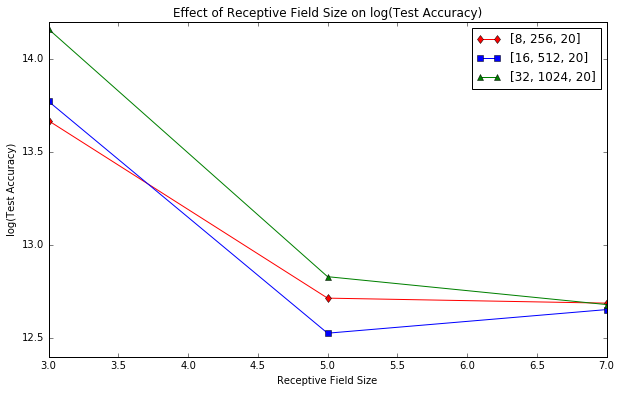

In [6]:
x = [3, 5, 7]
y_8_256 = [13.669231, 12.715385, 12.688462]
y_16_512 = [13.773077, 12.526923, 12.653846]
y_32_1024 = [14.161538, 12.830769, 12.680769]

plt.figure(figsize=(10, 6))
plt.plot(x, y_8_256, 'rd-', label='[8, 256, 20]')
plt.plot(x, y_16_512, 'bs-', label='[16, 512, 20]') 
plt.plot(x, y_32_1024, 'g^-', label='[32, 1024, 20]') 
plt.xlabel('Receptive Field Size') 
plt.ylabel('log(Test Accuracy)')
plt.title('Effect of Receptive Field Size on log(Test Accuracy)')
plt.legend(loc=1)
plt.show()

The best results are obtained with a a receptive field size of 5 with 16 filters in the 1st stage and 512 filters in the second stage. Just like in the previous case, with a smaller field size the CNN does not get enough coverage of the image for max pooling to work effectively and with a larger field size the CNN loses too much information from max pooling. However, the number of filters matter more in this case due to subsampling.

#### Bullet 3: Explain why the back-propogation algorithm works on MS-CNN

The back-propagation algorithm works on MS-CNN as it is represented as a computational graph in Theano. As Theano also supports symbolic differentation, the additional subsamples are represented as an additional node in the graph describing how their derivatives can be computed. This node is then linked to the 1st stage and classifier and hence the node can be intepreted as the derivative of the classifier with respect to the subsamples from the 1st stage, which was described in the textbook. Hence, the back-propagation algorithm would work for any computational graph with differentiable nodes.

#### Bullet 4: Implement CNN plus MLP

In [ ]:
test_CDNN(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512],
            batch_size=200, filter_size=5, dnn_layers=2, n_hidden=500, verbose=False)

The test_CDNN by far outperforms the MLP with 4 hidden layers but has slightly poorer performance compared 

#### Bonus 1

16 Gabor filters were generated using OpenCV's get_gaborkernel function. The experiments were carried out with varying lambda values.

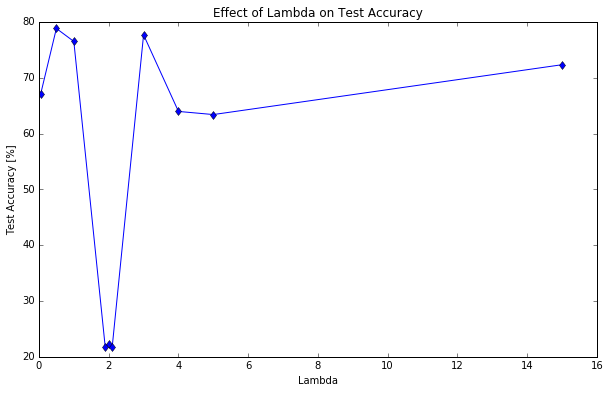

In [16]:
x = [0.05, 0.5, 1, 1.9, 2, 2.1, 3, 4, 5, 15]
y = [67.119231, 78.842308, 76.515385, 21.784615, 22.342308, 21.746154, 77.692308, 63.973077, 63.411538, 72.346154]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bd-')
plt.xlabel('Lambda') 
plt.ylabel('Test Accuracy [%]')
plt.title('Effect of Lambda on Test Accuracy')
plt.show()

In [3]:
def build_gabor(ksize, num, lmbda):
    filters = []
    ksize = ksize
    for theta in numpy.arange(0, numpy.pi, numpy.pi / num):
        kern = cv2.getGaborKernel((ksize, ksize), 1.0, theta, lmbda, 0.5, 0,  ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters

lmbda_1_9 = build_gabor(5, 16, 1.9)
lmbda_2 = build_gabor(5, 16, 2)
lmbda_2_1 = build_gabor(5, 16, 2.1)

params = test_lenet(nkerns=[16, 512], filter_size=5, verbose=True) 

test_lenet [16, 512] 5 False None
... building the model
... training
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 329/329, validation error 45.041667 %
     epoch 1, minibatch 329/329, test error of best model 45.530769 %
training @ iter =  400
training @ iter =  500
training @ iter =  600
epoch 2, minibatch 329/329, validation error 17.569444 %
     epoch 2, minibatch 329/329, test error of best model 17.830769 %
training @ iter =  700
training @ iter =  800
training @ iter =  900
epoch 3, minibatch 329/329, validation error 13.763889 %
     epoch 3, minibatch 329/329, test error of best model 14.538462 %
training @ iter =  1000
training @ iter =  1100
training @ iter =  1200
training @ iter =  1300
epoch 4, minibatch 329/329, validation error 12.319444 %
     epoch 4, minibatch 329/329, test error of best model 13.169231 %
training @ iter =  1400
training @ iter =  1500
training @ iter =  1600
epoch 5, minibatch 329/329

The training process for function test_lenet ran for 11.13m


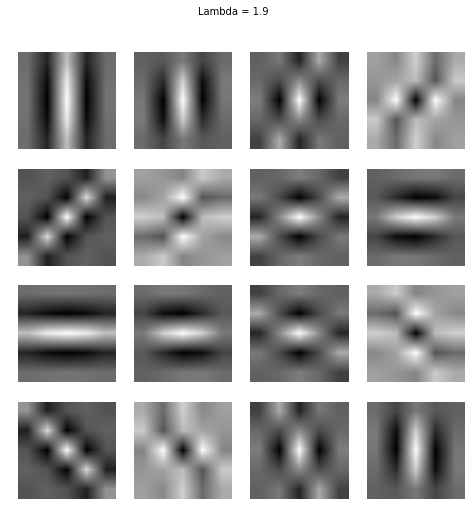

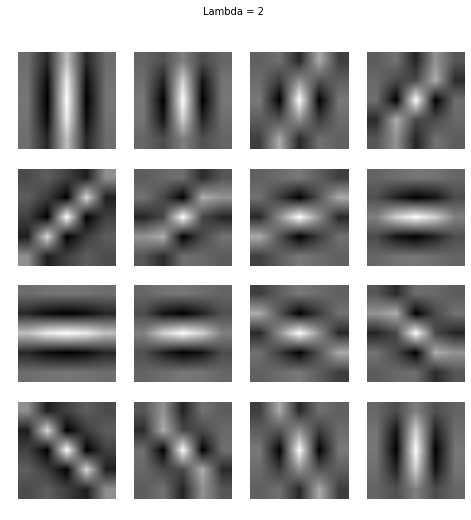

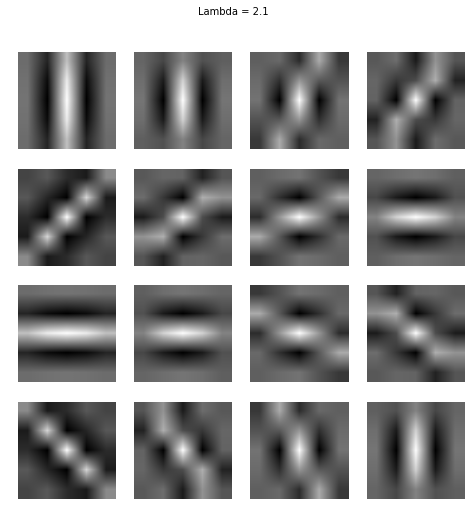

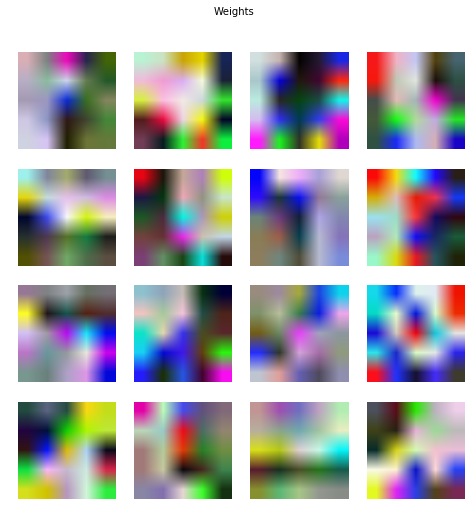

In [15]:
plt.figure(figsize=(8,8))
for k in range(16):
    plt.subplot(4, 4, k+1)
    plt.imshow(lmbda_1_9[k], cmap='gray')
    plt.axis('off')
plt.suptitle('Lambda = 1.9')

plt.figure(figsize=(8,8))
plt.title('Lambda = 2')
for k in range(16):
    plt.subplot(4, 4, k+1)
    plt.imshow(lmbda_2[k], cmap='gray')
    plt.axis('off')
plt.suptitle('Lambda = 2')

plt.figure(figsize=(8,8))
for k in range(16):
    plt.subplot(4, 4, k+1)
    plt.imshow(lmbda_2_1[k], cmap='gray')
    plt.axis('off')
plt.suptitle('Lambda = 2.1')

plt.figure(figsize=(8, 8))
for k in range(16):
    plt.subplot(4, 4, k+1)
    plt.imshow(params[k, :, :, :].reshape(3,5,5).transpose(1,2,0), cmap='gray' )
    plt.axis('off')
plt.suptitle('Weights')

#### Bonus 2

The MLP with 4 x 14 x 14 = 784 neurons in its first hidden layer, 16 x 5 x 5 = 400 neurons in its second hidden layer and 500 neurons in third hidden layer and hence has a total of 2 x (784 + 400 + 500) = 3368 parameters to account for the biases. The CNN has 4 x 3 x 5 x 5 + 4 = 304 in the first stage, 16 x 3 x 5 x 5 + 16 = 1216 in the second stage and 500 in the hidden layer which gives a total of 304 + 1216 + 1000 = 2520 parameters. Hence the CNN has much fewer parameters to learn.

The MLP performs much more poorly than the CNN with 4 filters in its first hidden layer and 16 filters in its second hidden layer. However, the run time for the MLP is shorter as it requires less overall computation as compared to CNN due to the convolutions and maxpooling operations even though it contains more neurons/activation functions.